In [1]:
import glob
import json
import os
import pickle
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

module_path = os.path.abspath(os.path.join("../../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.config import PATH_BEST_MODELS, PATH_REPORTS  # noqa: E402

In [2]:
CORPUS_KIND = "reddit"
CORPUS_NAME = "depression"

In [3]:
def get_model_information(file_path):
    with open(file_path) as f:
        model_information = json.load(fp=f)
    return model_information


def get_model_report(file_path):
    with open(file_path, "rb") as f:
        (
            classifier,
            classification_report,
            precision,
            recall,
            f1,
            accuracy,
            confusion_matrix,
            elapsed_mins,
            elapsed_secs,
        ) = pickle.load(f)
    output_dictionary = {
        "classification_report": classification_report,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix,
        "elapsed_mins": elapsed_mins,
        "elapsed_secs": elapsed_secs,
    }
    return output_dictionary

In [4]:
representations_list = [
    "bow",
    "lda",
    "lsa",
    "doc2vec",
    "padded_sequential",
    "bert_tokenizer",
]
best_measures = ["f1", "positive_f1"]

model_identifier = 0

# Dictionary used to create an empty DataFrame with the correct columns.
base_dictionary = {
    "model_identifier": [],
    "corpus_kind": [],
    "corpus_name": [],
    "representation": [],
    "representation_information": [],
    "train_file_path": [],
    "random_seed": [],
    "classifier_type": [],
    "classifier_params": [],
    "classification_report": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "accuracy": [],
    "confusion_matrix": [],
    "elapsed_mins": [],
    "elapsed_secs": [],
    "total_secs": [],
    "file_name": [],
}
result_comparison = pd.DataFrame(base_dictionary)

for current_measure in best_measures:
    for representation in representations_list:
        base_path = os.path.join(
            PATH_BEST_MODELS, current_measure, CORPUS_KIND, CORPUS_NAME, representation
        )
        possible_json_files = glob.glob(f"{base_path}/*_model_information.json")
        for json_file in possible_json_files:
            pkl_file = json_file[:-16] + "and_report.pkl"

            model_information = get_model_information(json_file)
            output_dictionary = get_model_report(pkl_file)
            file_name = os.path.splitext(os.path.basename(json_file))[0]

            total_secs = (
                output_dictionary["elapsed_mins"] * 60
                + output_dictionary["elapsed_secs"]
            )

            df_row = {
                "model_identifier": model_identifier,
                "current_measure": current_measure,
                "file_name": file_name,
                "total_secs": total_secs,
            }
            df_row.update(model_information)
            df_row.update(output_dictionary)

            result_comparison = result_comparison.append(df_row, ignore_index=True)

            model_identifier += 1

In [5]:
result_comparison

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,precision,recall,f1,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name,current_measure
0,0.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.933238,0.934593,0.933878,0.934880,"[[593, 40], [33, 455]]",0.0,1.0,1.0,0150_model_information,f1
1,1.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/unsl_erisk_2022/data/processed/r...,16.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,0.874260,0.880560,0.872900,0.873327,"[[522, 111], [31, 457]]",0.0,0.0,0.0,0046_model_information,f1
2,2.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,0.931566,0.932544,0.932035,0.933095,"[[593, 40], [35, 453]]",0.0,12.0,12.0,0180_model_information,f1
3,3.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,28.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,0.929595,0.928766,0.929168,0.930419,"[[596, 37], [41, 447]]",0.0,1.0,1.0,0148_model_information,f1
4,4.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,16.0,LogisticRegression,"{'C': 8, 'class_weight': None, 'dual': False, ...",precision recall f1-score ...,0.932544,0.933334,0.932926,0.933988,"[[594, 39], [35, 453]]",0.0,0.0,0.0,0076_model_information,f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,1475.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,9.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.883432,0.888802,0.884844,0.885816,"[[548, 85], [43, 445]]",288.0,39.0,17319.0,09_model_information,positive_f1
1476,1476.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,3.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.882580,0.888012,0.883963,0.884924,"[[547, 86], [43, 445]]",287.0,38.0,17258.0,03_model_information,positive_f1
1477,1477.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,14.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.885145,0.890382,0.886606,0.887600,"[[550, 83], [43, 445]]",288.0,41.0,17321.0,14_model_information,positive_f1
1478,1478.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,8.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,0.882498,0.887777,0.883925,0.884924,"[[548, 85], [44, 444]]",288.0,43.0,17323.0,08_model_information,positive_f1


In [6]:
result_comparison.groupby(by="representation")["f1"].max()

representation
bert_tokenizer       0.886606
bow                  0.937415
doc2vec              0.932926
lda                  0.927616
lsa                  0.924752
padded_sequential    0.868409
Name: f1, dtype: float64

In [7]:
def get_positive_recall(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fn = confusion_matrix.item((1, 0))
    div = tp + fn
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)


def get_positive_precision(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fp = confusion_matrix.item((0, 1))
    div = tp + fp
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)


def get_positive_f1_score(confusion_matrix):
    tp = confusion_matrix.item((1, 1))
    fp = confusion_matrix.item((0, 1))
    fn = confusion_matrix.item((1, 0))
    div = tp + 0.5 * (fp + fn)
    if div == 0:
        return 0.0
    else:
        return round(tp / div, 2)

In [8]:
result_comparison["positive_recall"] = result_comparison.confusion_matrix.apply(
    get_positive_recall
)
result_comparison["positive_precision"] = result_comparison.confusion_matrix.apply(
    get_positive_precision
)
result_comparison["positive_f1"] = result_comparison.confusion_matrix.apply(
    get_positive_f1_score
)
result_comparison

,model_identifier,corpus_kind,corpus_name,representation,representation_information,train_file_path,random_seed,classifier_type,classifier_params,classification_report,...,accuracy,confusion_matrix,elapsed_mins,elapsed_secs,total_secs,file_name,current_measure,positive_recall,positive_precision,positive_f1
0,0.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,30.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,...,0.934880,"[[593, 40], [33, 455]]",0.0,1.0,1.0,0150_model_information,f1,0.93,0.92,0.93
1,1.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'char_...,/home2/loyola/unsl_erisk_2022/data/processed/r...,16.0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",precision recall f1-score ...,...,0.873327,"[[522, 111], [31, 457]]",0.0,0.0,0.0,0046_model_information,f1,0.94,0.80,0.87
2,2.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,30.0,SVC,"{'C': 2, 'break_ties': False, 'cache_size': 20...",precision recall f1-score ...,...,0.933095,"[[593, 40], [35, 453]]",0.0,12.0,12.0,0180_model_information,f1,0.93,0.92,0.92
3,3.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,28.0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",precision recall f1-score ...,...,0.930419,"[[596, 37], [41, 447]]",0.0,1.0,1.0,0148_model_information,f1,0.92,0.92,0.92
4,4.0,reddit,depression,bow,{'CountVectorizer_params': {'analyzer': 'word'...,/home2/loyola/unsl_erisk_2022/data/processed/r...,16.0,LogisticRegression,"{'C': 8, 'class_weight': None, 'dual': False, ...",precision recall f1-score ...,...,0.933988,"[[594, 39], [35, 453]]",0.0,0.0,0.0,0076_model_information,f1,0.93,0.92,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,1475.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,9.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.885816,"[[548, 85], [43, 445]]",288.0,39.0,17319.0,09_model_information,positive_f1,0.91,0.84,0.87
1476,1476.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,3.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.884924,"[[547, 86], [43, 445]]",287.0,38.0,17258.0,03_model_information,positive_f1,0.91,0.84,0.87
1477,1477.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,14.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.887600,"[[550, 83], [43, 445]]",288.0,41.0,17321.0,14_model_information,positive_f1,0.91,0.84,0.88
1478,1478.0,reddit,depression,bert_tokenizer,PreTrainedTokenizer(name_or_path='roberta-base...,/home2/loyola/unsl_erisk_2022/data/interim/red...,8.0,BERT,{'model_architecture': 'BERT( (encoder): Rob...,precision recall f1-score ...,...,0.884924,"[[548, 85], [44, 444]]",288.0,43.0,17323.0,08_model_information,positive_f1,0.91,0.84,0.87


In [9]:
elapsed_time_training = result_comparison.total_secs.sum() / 60 / 60
print(f"Time spent training all the models: {elapsed_time_training:.02f} hours")

Time spent training all the models: 388.77 hours


In [10]:
best_measures = ["f1", "positive_f1"]

for current_measure in best_measures:
    today = datetime.today().strftime("%Y_%m_%d")
    report_file_name = "result_comparison_" + today + ".pkl"
    base_path = os.path.join(
        PATH_BEST_MODELS, current_measure, CORPUS_KIND, CORPUS_NAME
    )
    report_file_path = os.path.join(base_path, report_file_name)

    result_comparison[result_comparison.current_measure == current_measure].to_pickle(
        path=report_file_path, protocol=4
    )

In [11]:
def show_time_elapsed(comparison_type="representation", current_measure="f1"):
    measure = "total_secs"
    ncols = 2
    figsize = (15, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=False, figsize=figsize)
    axes = ax.ravel()

    current_df = result_comparison[result_comparison.current_measure == current_measure]

    groupby_result = list(current_df.groupby(by=comparison_type)[measure])
    data = []
    max_values = []
    labels = []

    # We separated these type of models because they had different values
    separated_groups = None
    if comparison_type == "representation":
        separated_groups = ["padded_sequential"]
    elif comparison_type == "classifier_type":
        separated_groups = ["EmbeddingLSTM"]

    for grouped_series in groupby_result:
        label = grouped_series[0]
        if label in separated_groups:
            continue
        np_series = grouped_series[1].to_numpy()
        labels.append(label)
        data.append(np_series)

    whis = [2, 98]
    axes[0].boxplot(data, whis=whis, labels=labels)
    for label in axes[0].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    axes[0].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[0].legend()

    data = []
    max_values = []
    labels = []
    for grouped_series in groupby_result:
        label = grouped_series[0]
        if label in separated_groups:
            np_series = grouped_series[1].to_numpy()
            labels.append(label)
            data.append(np_series)

    axes[1].boxplot(data, whis=whis, labels=labels)
    for label in axes[1].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    axes[1].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[1].legend()

    fig.suptitle(
        f'{comparison_type.title()} comparison based on the measure "{measure}"'
    )

    return fig

In [12]:
def show_boxplot(comparison_type="representation", measure="f1", current_measure="f1"):
    double_graph = False
    if measure in ["precision", "recall", "f1"]:
        double_graph = True

    ncols = 2 if double_graph else 1
    figsize = (15, 7) if double_graph else (7, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, sharey=True, figsize=figsize)
    axes = ax.ravel() if double_graph else [ax]

    current_df = result_comparison[result_comparison.current_measure == current_measure]

    groupby_result = list(current_df.groupby(by=comparison_type)[measure])
    data = []
    max_values = []
    labels = []
    for grouped_serie in groupby_result:
        label = grouped_serie[0]
        np_serie = grouped_serie[1].to_numpy()
        labels.append(label)
        data.append(np_serie)

    axes[0].set_title(
        f'{comparison_type.title()} comparison based on the measure "{measure}"'
    )
    whis = [2, 98]
    axes[0].boxplot(data, whis=whis, labels=labels)
    for label in axes[0].get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    axes[0].axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    axes[0].legend()

    if double_graph:
        second_measure = "positive_" + measure
        groupby_result = list(current_df.groupby(by=comparison_type)[second_measure])
        data = []
        max_values = []
        labels = []
        for grouped_serie in groupby_result:
            label = grouped_serie[0]
            np_serie = grouped_serie[1].to_numpy()
            labels.append(label)
            data.append(np_serie)

        axes[1].set_title(
            f'{comparison_type.title()} comparison based on the measure "{second_measure}"'
        )
        axes[1].boxplot(data, whis=whis, labels=labels)
        for label in axes[1].get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")

        max_values = [serie.max() for serie in data]
        max_value = max(max_values)
        axes[1].axhline(
            y=max_value,
            color="r",
            linestyle="--",
            xmin=xmin,
            xmax=xmax,
            label="maximum value",
        )
        axes[1].legend()

    plt.tight_layout()

    return fig

In [13]:
def show_matrix_max_values(measure="f1", current_measure="f1"):
    double_graph = False
    if measure in ["precision", "recall", "f1"]:
        double_graph = True

    ncols = 2 if double_graph else 1
    figsize = (15, 7) if double_graph else (7, 7)
    fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=figsize)
    axes = ax.ravel() if double_graph else [ax]

    current_df = result_comparison[result_comparison.current_measure == current_measure]

    groupby_result = list(
        current_df.groupby(by=["representation", "classifier_type"])[measure]
    )
    list_representation = []
    list_classifier_type = []
    list_max_value = []
    for grouped_serie in groupby_result:
        representation = grouped_serie[0][0]
        classifier_type = grouped_serie[0][1]
        max_value = grouped_serie[1].to_numpy().max()

        list_representation.append(representation)
        list_classifier_type.append(classifier_type)
        list_max_value.append(max_value)

    data = {
        "representation": list_representation,
        "classifier_type": list_classifier_type,
        "max_value": list_max_value,
    }
    df = pd.DataFrame(data=data)
    df = df.pivot("representation", "classifier_type", "max_value")
    sns.heatmap(df, ax=axes[0], annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn")

    axes[0].set_title(f'Maximum values for the measure "{measure}"')

    if double_graph:
        second_measure = "positive_" + measure
        groupby_result = list(
            current_df.groupby(by=["representation", "classifier_type"])[measure]
        )
        list_representation = []
        list_classifier_type = []
        list_max_value = []
        for grouped_serie in groupby_result:
            representation = grouped_serie[0][0]
            classifier_type = grouped_serie[0][1]
            max_value = grouped_serie[1].to_numpy().max()

            list_representation.append(representation)
            list_classifier_type.append(classifier_type)
            list_max_value.append(max_value)

        data = {
            "representation": list_representation,
            "classifier_type": list_classifier_type,
            "max_value": list_max_value,
        }
        df = pd.DataFrame(data=data)
        df = df.pivot("representation", "classifier_type", "max_value")
        sns.heatmap(
            df, ax=axes[1], annot=True, fmt=".2f", vmin=0, vmax=1, cmap="RdYlGn"
        )

        axes[1].set_title(f'Maximum values for the measure "{second_measure}"')

    plt.tight_layout()

    return fig

In [14]:
PATH_TO_REPORT_FIGURES = os.path.join(
    PATH_REPORTS, CORPUS_KIND, CORPUS_NAME, "01_atemporal_classification_erisk/figures"
)
os.makedirs(PATH_TO_REPORT_FIGURES, exist_ok=True)
fig_dip = 300

## Results for the models with better values for the measure `f1`

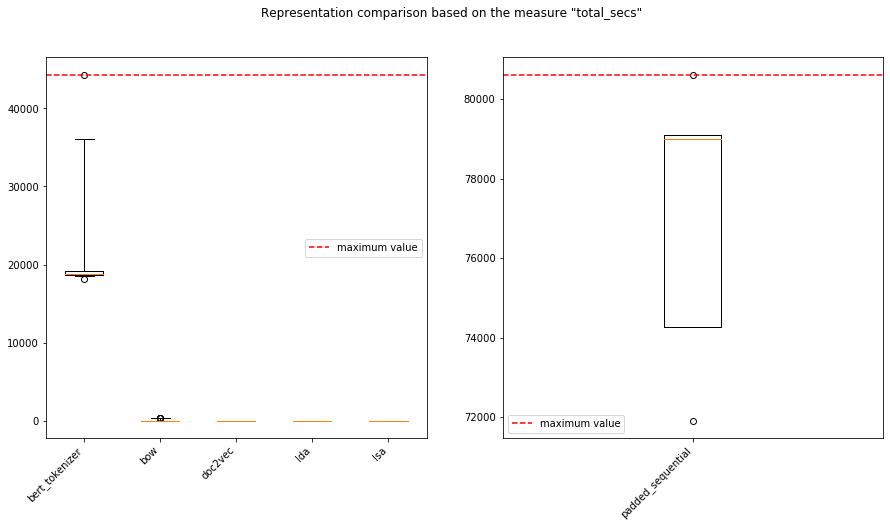

In [15]:
_ = show_time_elapsed(comparison_type="representation", current_measure="f1")

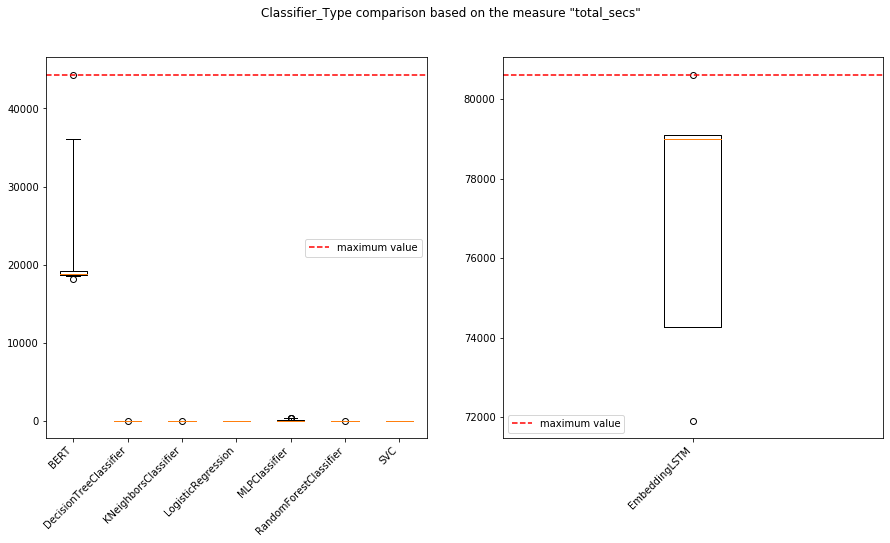

In [16]:
_ = show_time_elapsed(comparison_type="classifier_type", current_measure="f1")

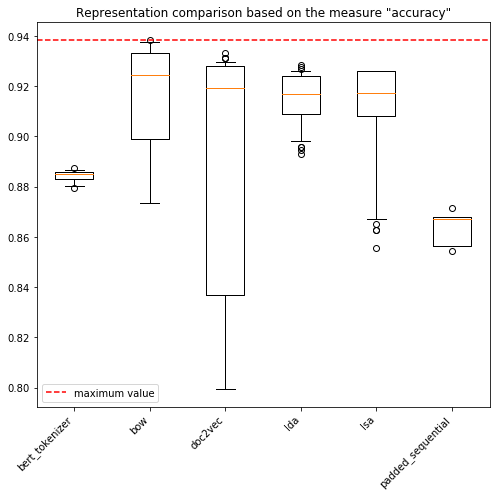

In [17]:
_ = show_boxplot(
    comparison_type="representation", measure="accuracy", current_measure="f1"
)

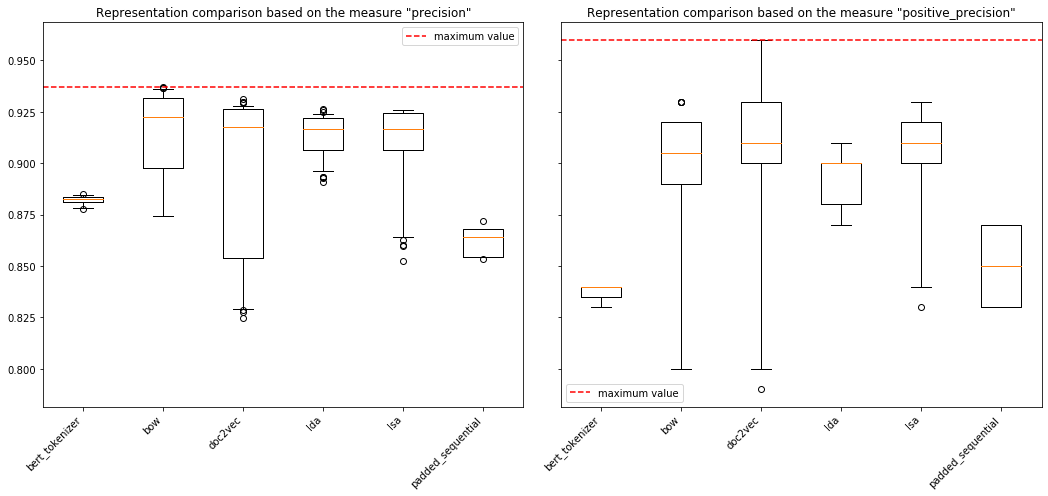

In [18]:
_ = show_boxplot(
    comparison_type="representation", measure="precision", current_measure="f1"
)

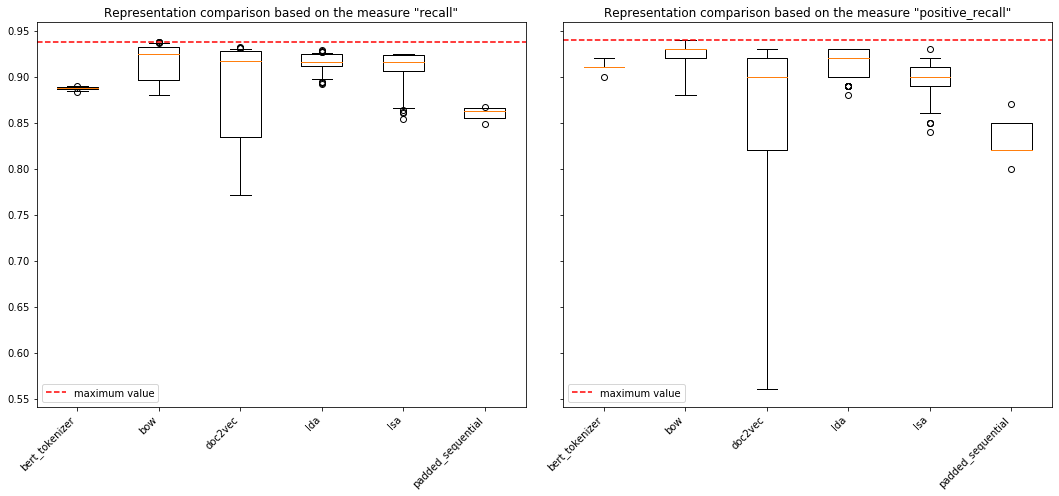

In [19]:
_ = show_boxplot(
    comparison_type="representation", measure="recall", current_measure="f1"
)

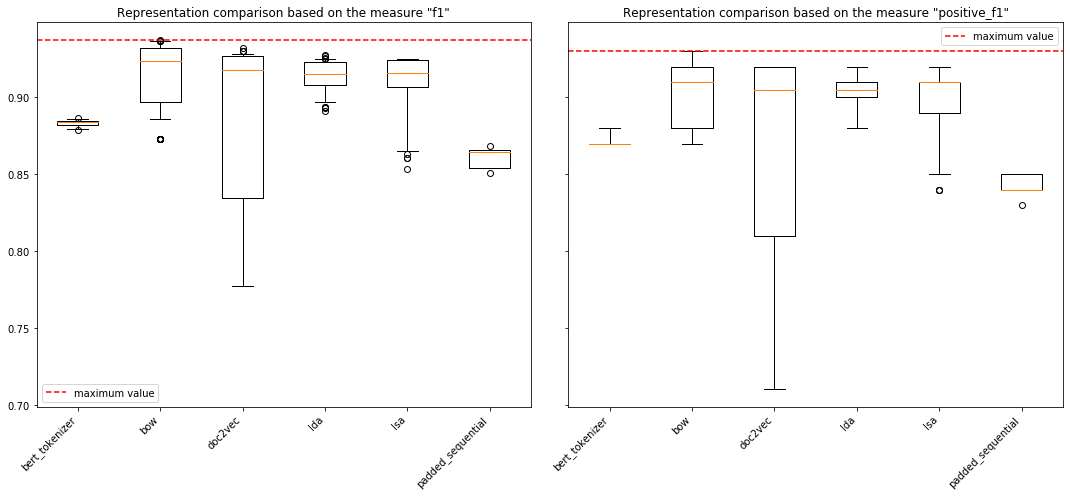

In [20]:
_ = show_boxplot(comparison_type="representation", measure="f1", current_measure="f1")

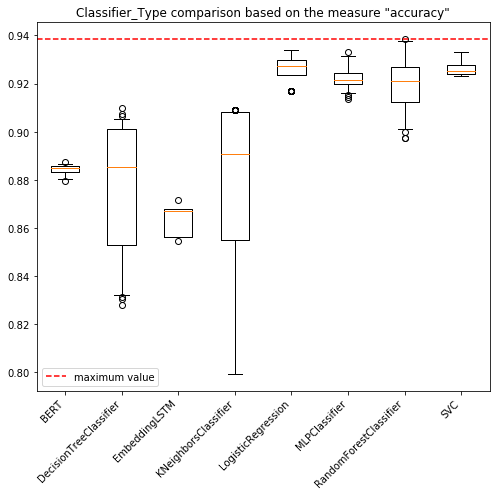

In [21]:
_ = show_boxplot(
    comparison_type="classifier_type", measure="accuracy", current_measure="f1"
)

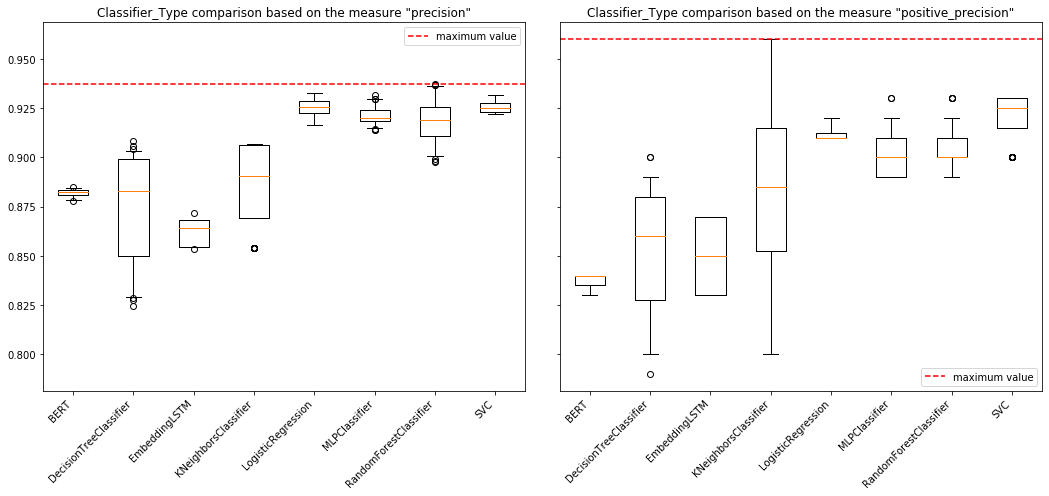

In [22]:
_ = show_boxplot(
    comparison_type="classifier_type", measure="precision", current_measure="f1"
)

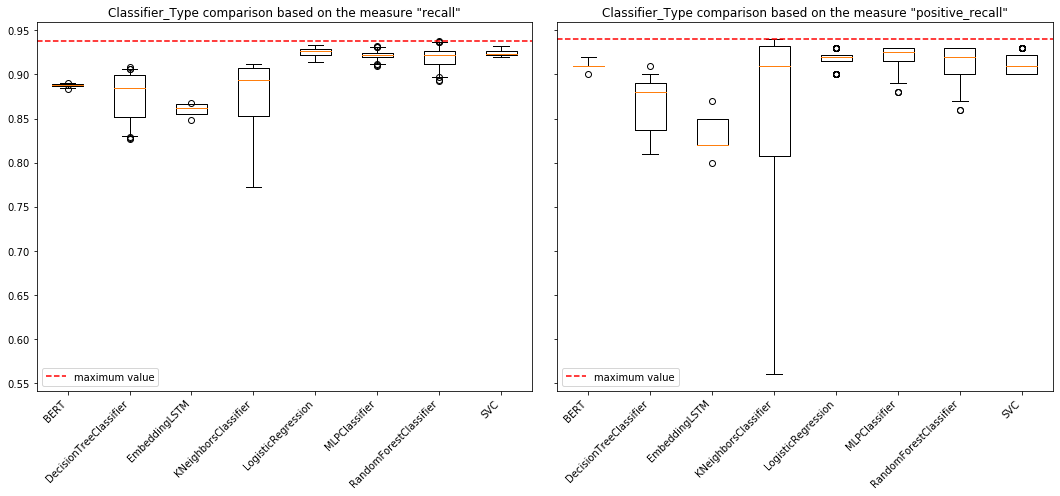

In [23]:
_ = show_boxplot(
    comparison_type="classifier_type", measure="recall", current_measure="f1"
)

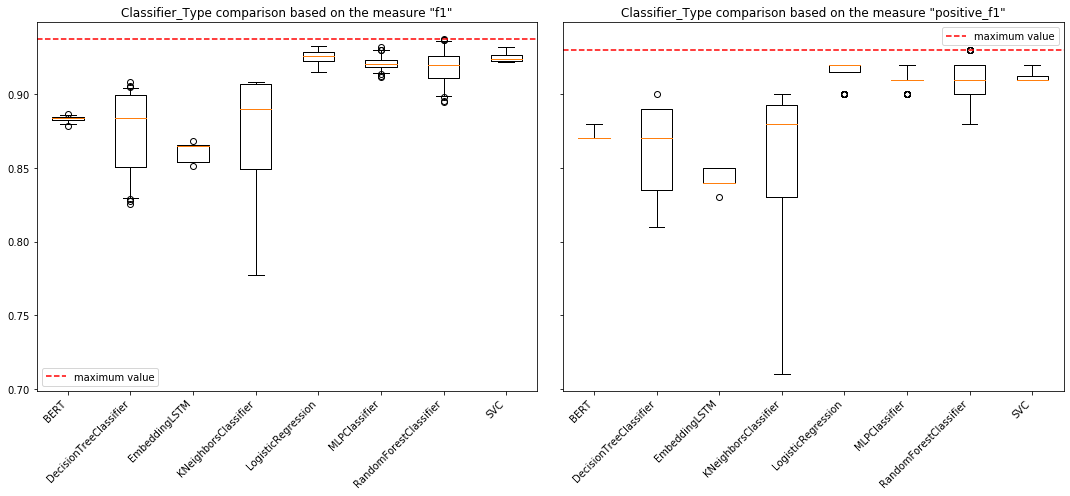

In [24]:
_ = show_boxplot(comparison_type="classifier_type", measure="f1", current_measure="f1")

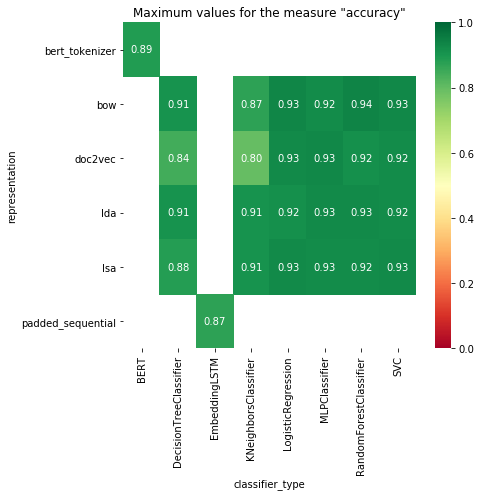

In [25]:
_ = show_matrix_max_values(measure="accuracy", current_measure="f1")

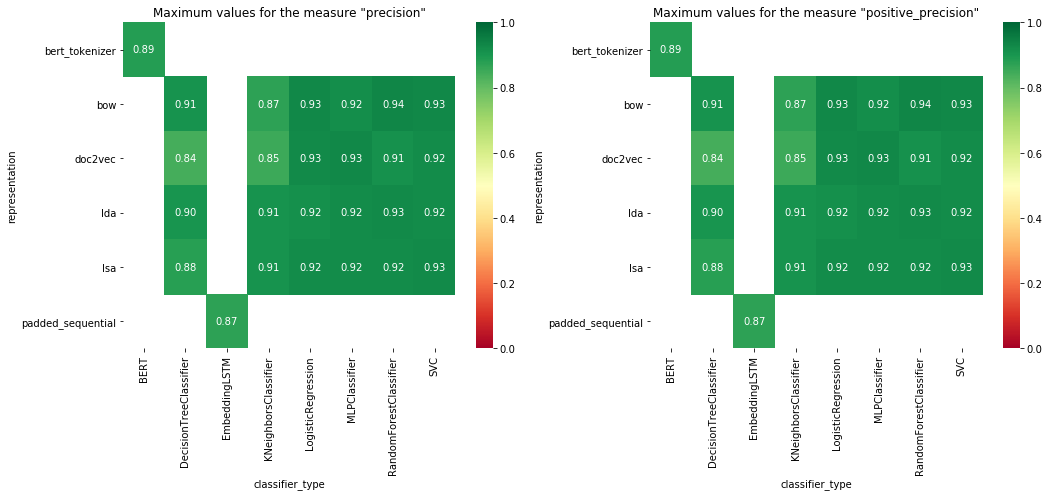

In [26]:
_ = show_matrix_max_values(measure="precision", current_measure="f1")

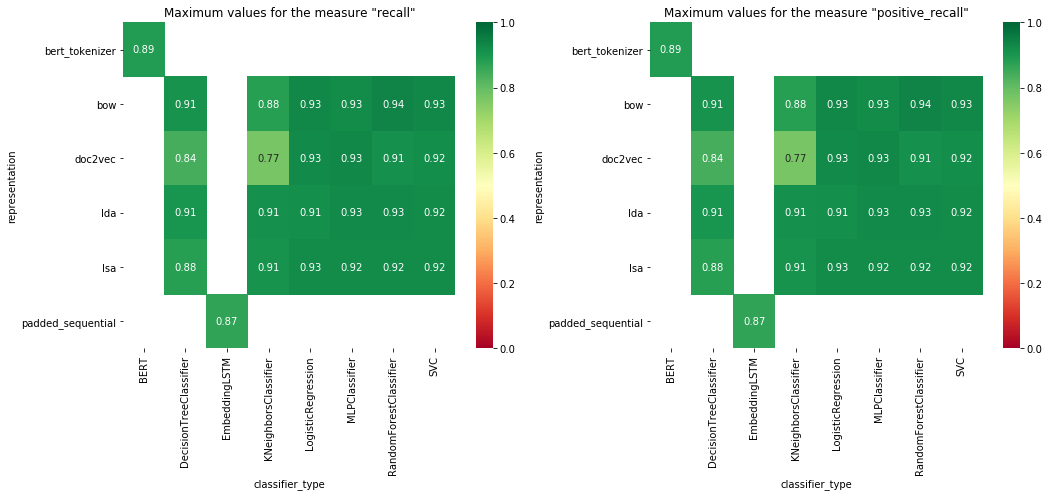

In [27]:
_ = show_matrix_max_values(measure="recall", current_measure="f1")

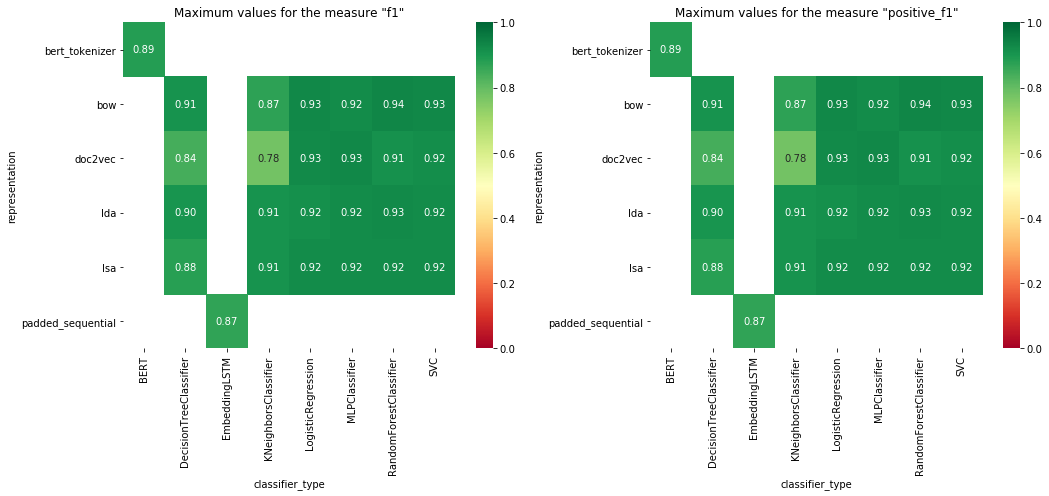

In [28]:
figure = show_matrix_max_values(measure="f1", current_measure="f1")

file_name = "10_f1_best_experiments_f1_max_values.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

## Results for the models with better values for the measure `positive_f1`

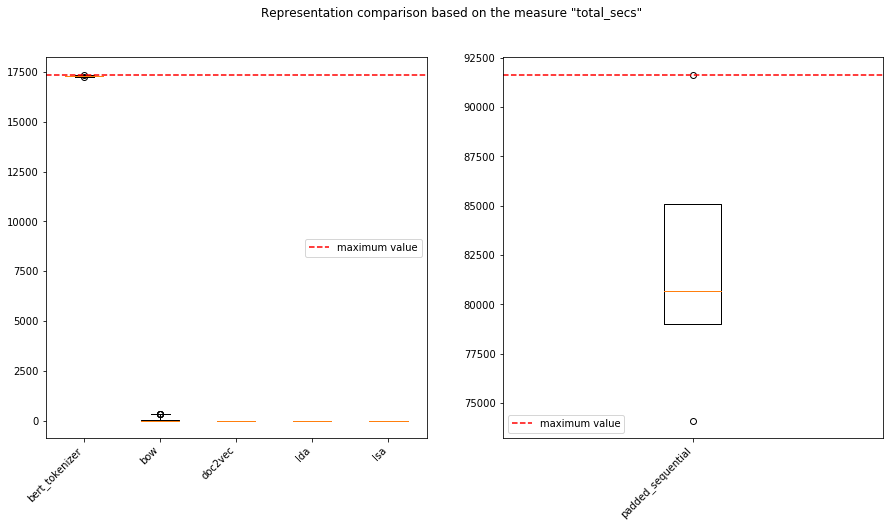

In [29]:
_ = show_time_elapsed(comparison_type="representation", current_measure="positive_f1")

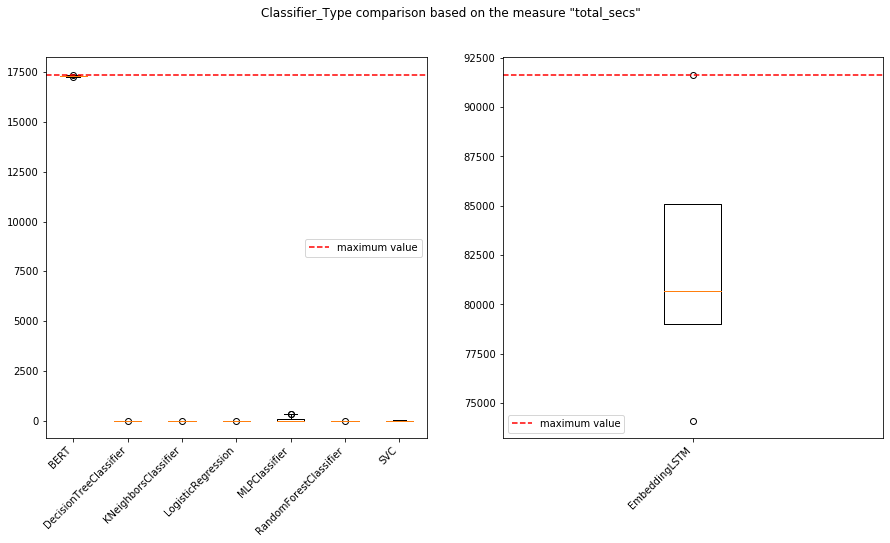

In [30]:
_ = show_time_elapsed(comparison_type="classifier_type", current_measure="positive_f1")

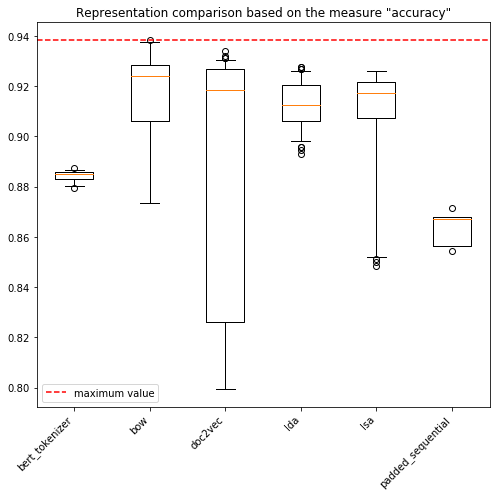

In [31]:
_ = show_boxplot(
    comparison_type="representation", measure="accuracy", current_measure="positive_f1"
)

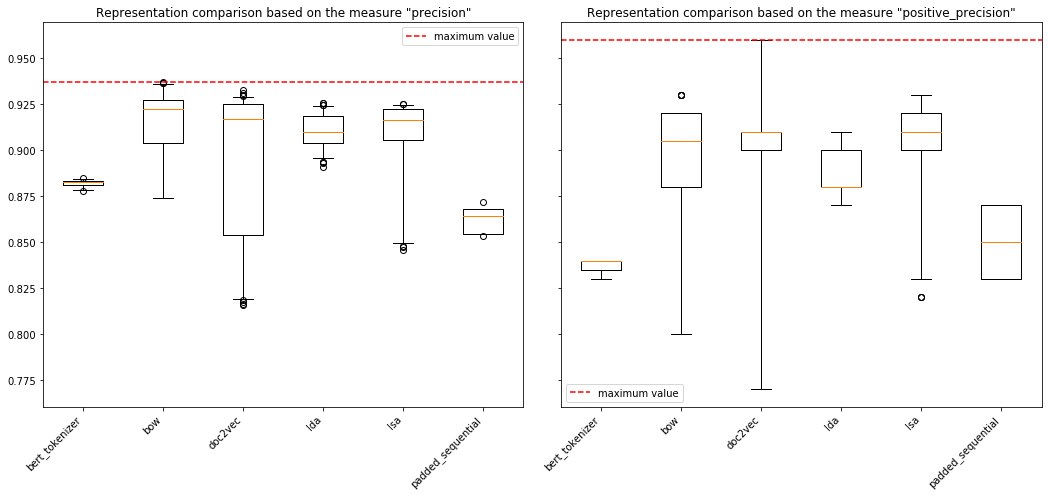

In [32]:
_ = show_boxplot(
    comparison_type="representation", measure="precision", current_measure="positive_f1"
)

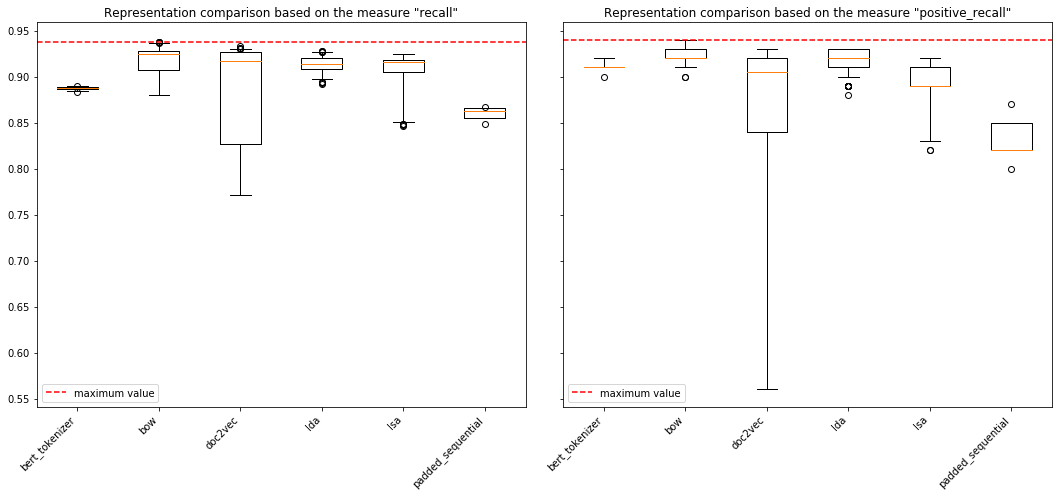

In [33]:
_ = show_boxplot(
    comparison_type="representation", measure="recall", current_measure="positive_f1"
)

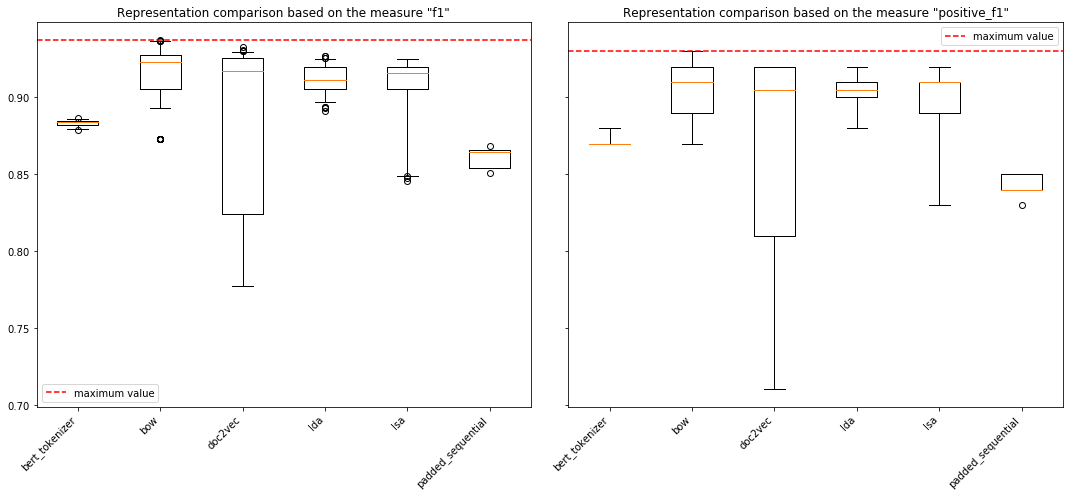

In [34]:
_ = show_boxplot(
    comparison_type="representation", measure="f1", current_measure="positive_f1"
)

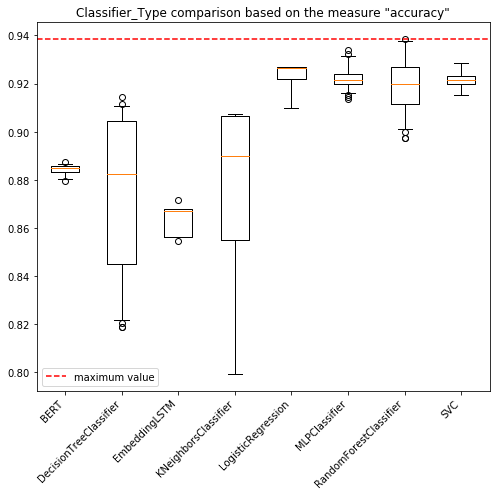

In [35]:
_ = show_boxplot(
    comparison_type="classifier_type", measure="accuracy", current_measure="positive_f1"
)

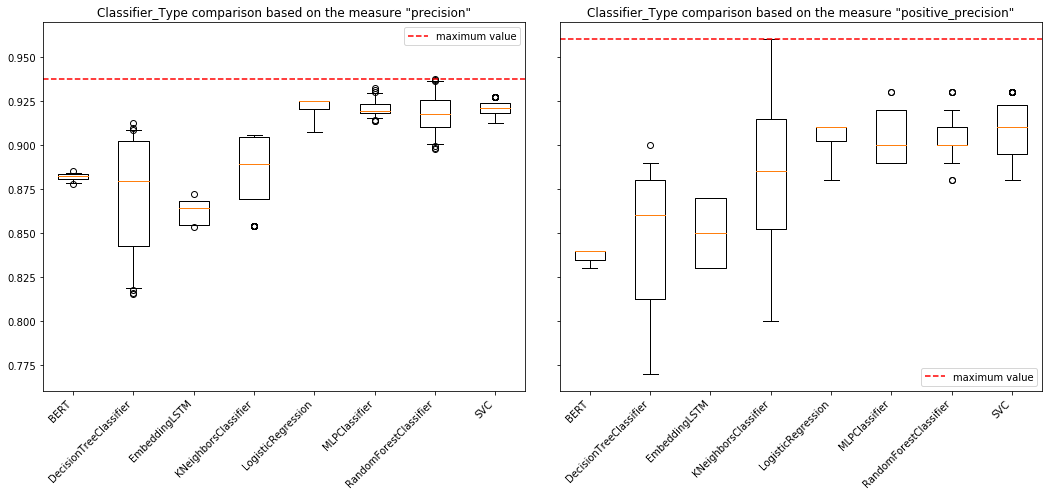

In [36]:
_ = show_boxplot(
    comparison_type="classifier_type",
    measure="precision",
    current_measure="positive_f1",
)

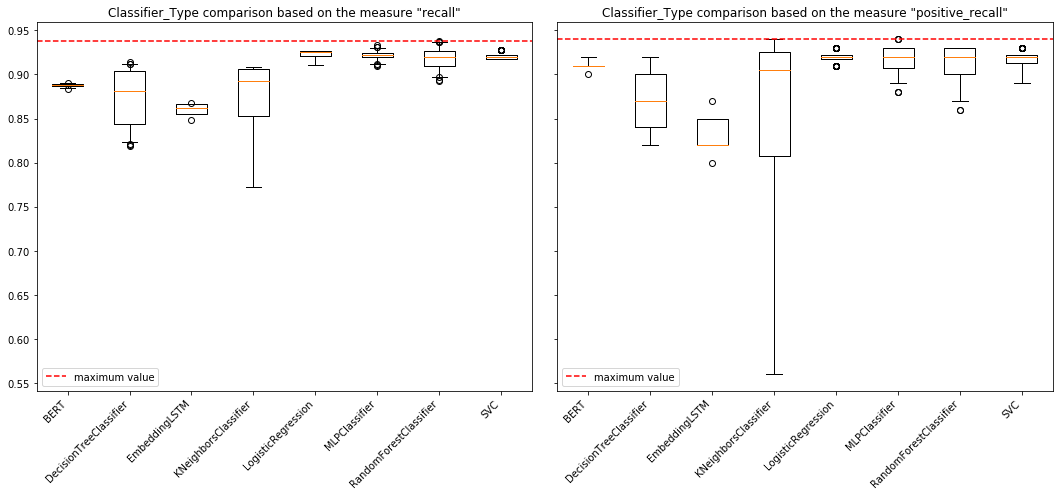

In [37]:
_ = show_boxplot(
    comparison_type="classifier_type", measure="recall", current_measure="positive_f1"
)

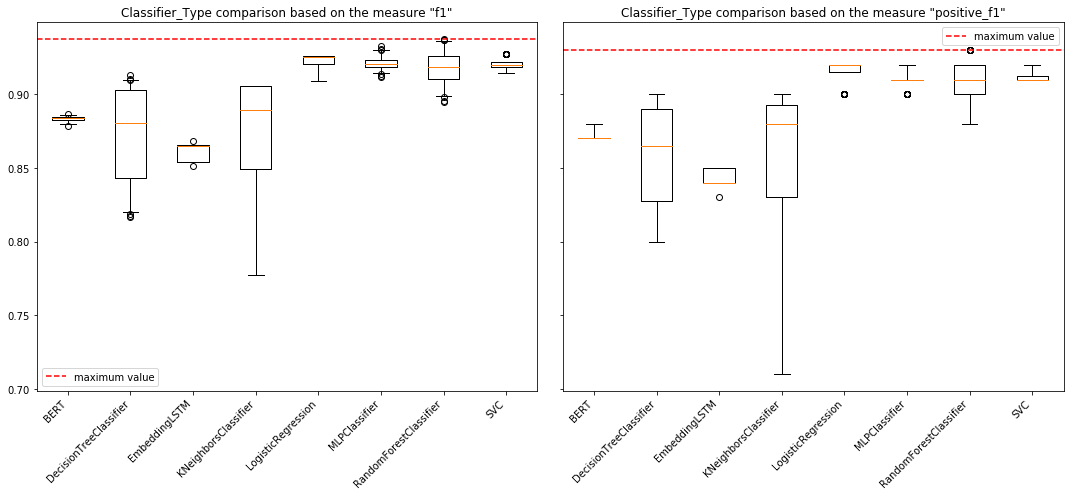

In [38]:
_ = show_boxplot(
    comparison_type="classifier_type", measure="f1", current_measure="positive_f1"
)

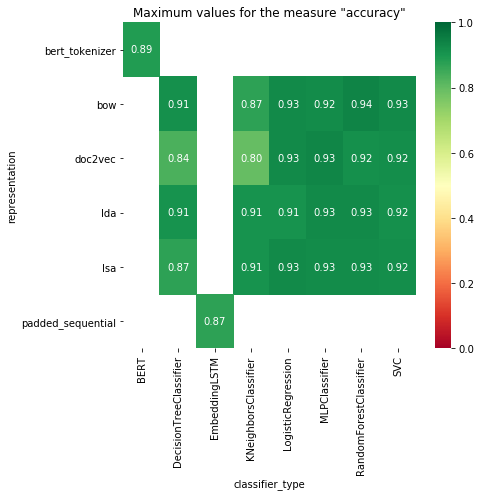

In [39]:
_ = show_matrix_max_values(measure="accuracy", current_measure="positive_f1")

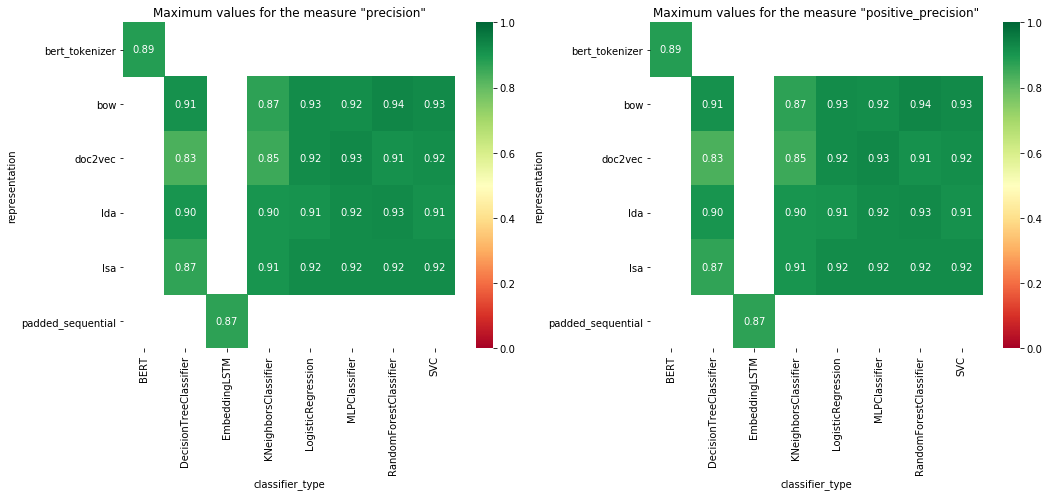

In [40]:
_ = show_matrix_max_values(measure="precision", current_measure="positive_f1")

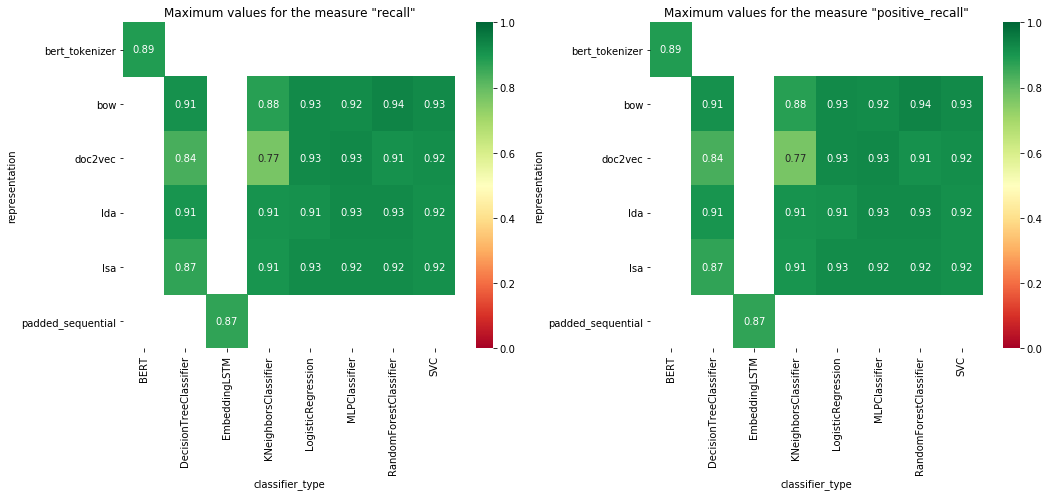

In [41]:
_ = show_matrix_max_values(measure="recall", current_measure="positive_f1")

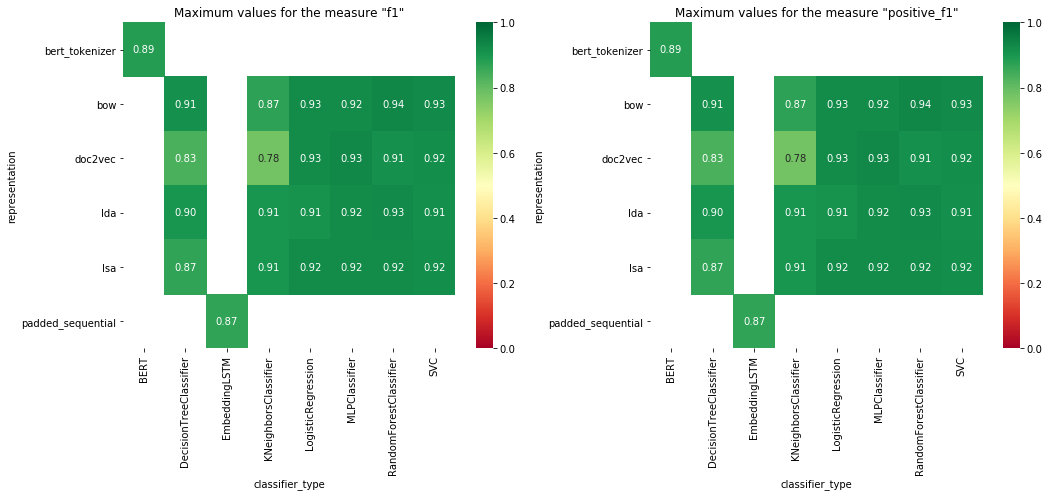

In [42]:
figure = show_matrix_max_values(measure="f1", current_measure="positive_f1")

file_name = "11_positive_f1_best_experiments_f1_max_values.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

# Analyze the experiment replicas
We observe the distribution of times and the different performance measurements for the same parameters, only alternating the random seed or shuffling the corpus to obtain other results (in some models).

In [43]:
def get_replica_results_subplot(
    representation="bow", measure="f1", current_measure="f1", ax=None
):
    if ax is None:
        figsize = (7, 7)
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    current_df = result_comparison.loc[
        (result_comparison.representation == representation)
        & (result_comparison.current_measure == current_measure)
    ]

    groupby_result = list(current_df.groupby(by="classifier_type")[measure])
    data = []
    max_values = []
    labels = []
    for grouped_serie in groupby_result:
        label = grouped_serie[0]
        np_serie = grouped_serie[1].to_numpy()
        labels.append(label)
        data.append(np_serie)

    ax.set_title(
        f'Experiments replicas that obatained the best "{current_measure}" for\n'
        f'{representation} looking at "{measure}"'
    )
    whis = [2, 98]
    ax.boxplot(data, whis=whis, labels=labels)
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

    max_values = [serie.max() for serie in data]
    max_value = max(max_values)
    xmin, xmax = 0, 1
    ax.axhline(
        y=max_value,
        color="r",
        linestyle="--",
        xmin=xmin,
        xmax=xmax,
        label="maximum value",
    )
    ax.legend()

    return ax

In [44]:
def show_replica_results(measure="f1", current_measure="f1"):
    representations_list = result_comparison.representation.unique().tolist()

    nrows = (len(representations_list) + 1) // 2
    figsize = (15, 15)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharey=False, figsize=figsize)
    axes = ax.ravel()

    for i, representation in enumerate(representations_list):
        get_replica_results_subplot(
            representation=representation,
            measure=measure,
            current_measure=current_measure,
            ax=axes[i],
        )
    if len(representations_list) % 2 == 1:
        axes[-1].set_axis_off()
    plt.tight_layout()

    return fig

## Results for the replicas with better values for the measure `f1`

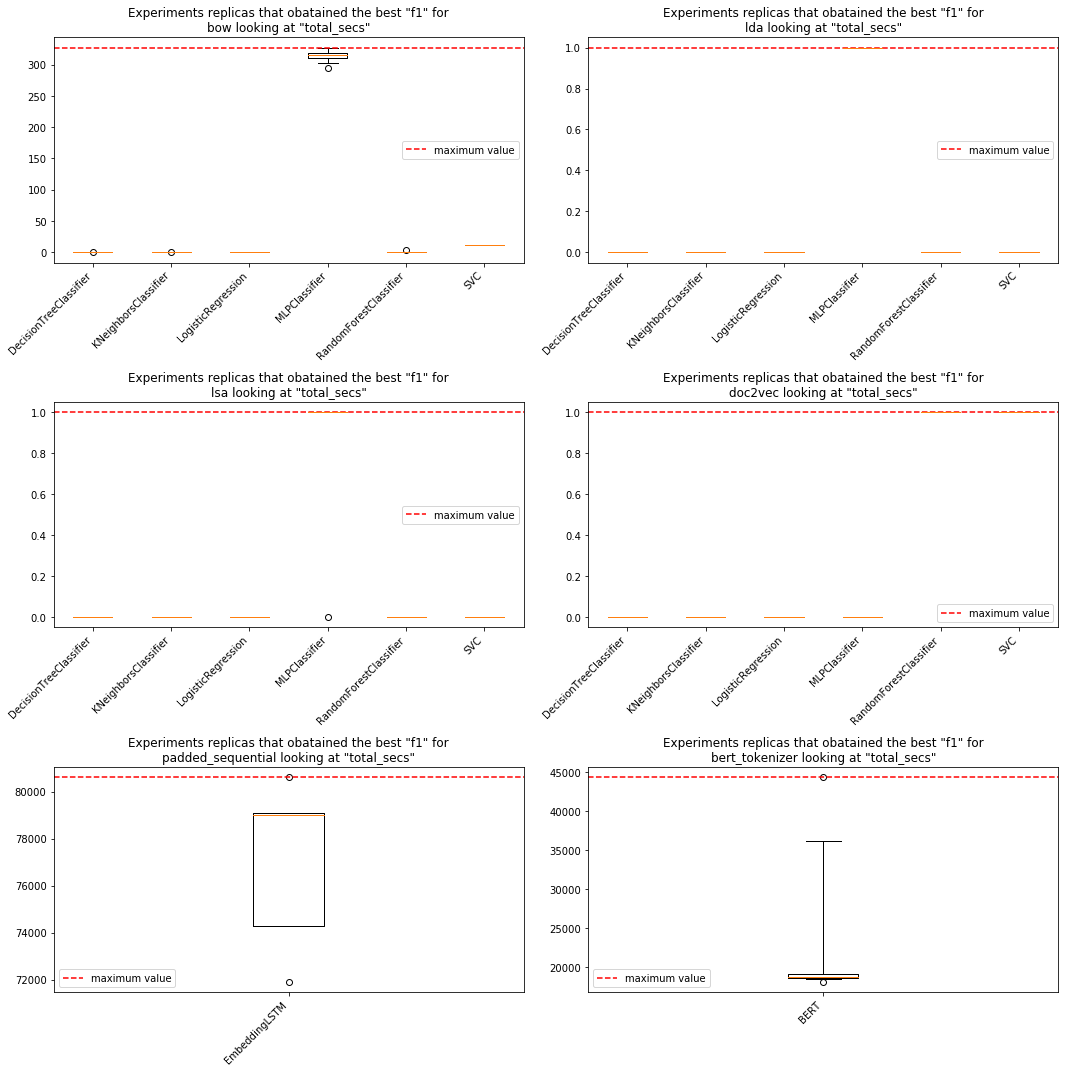

In [45]:
_ = show_replica_results(measure="total_secs", current_measure="f1")

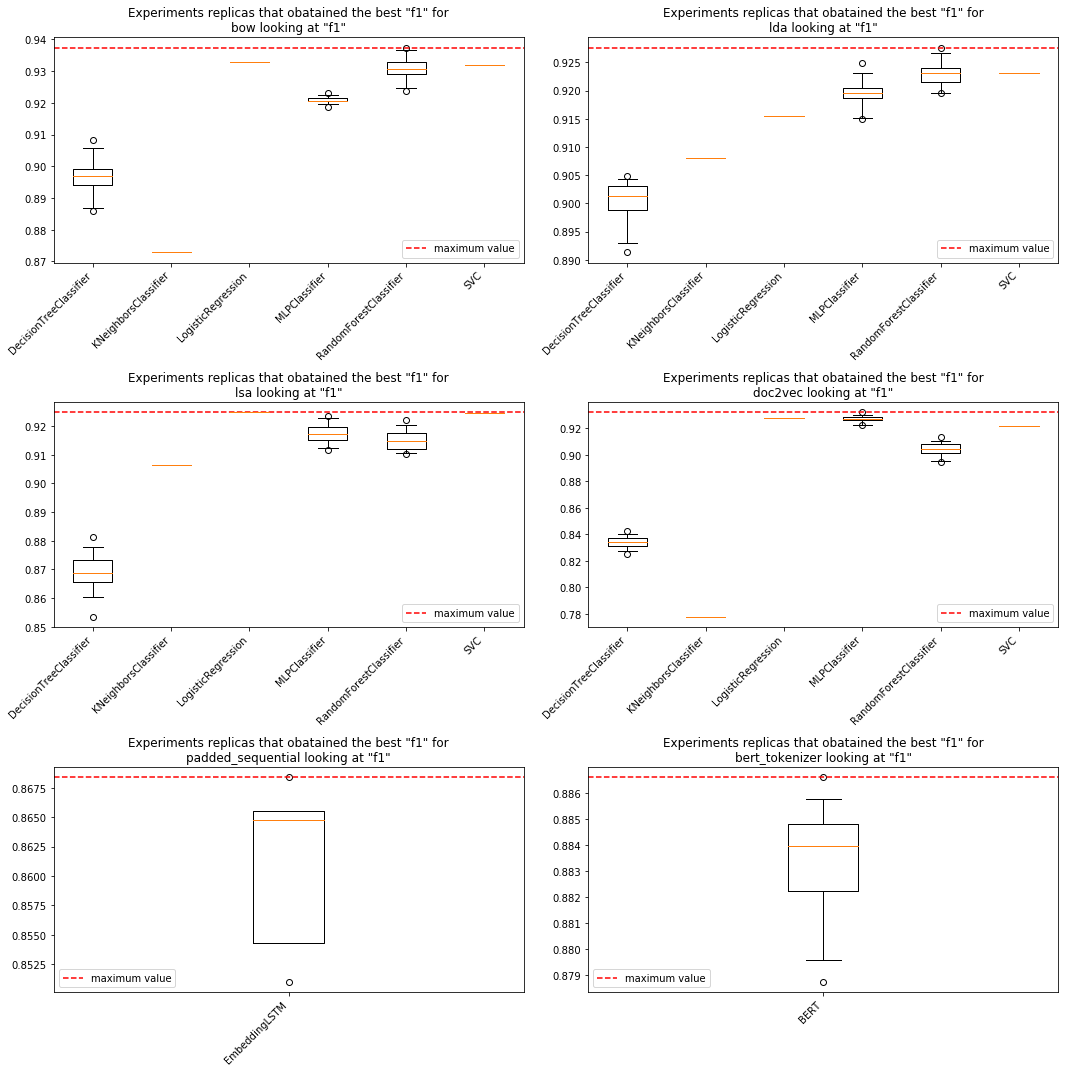

In [46]:
figure = show_replica_results(measure="f1", current_measure="f1")

file_name = "12_f1_best_experiments_f1_comparison.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)

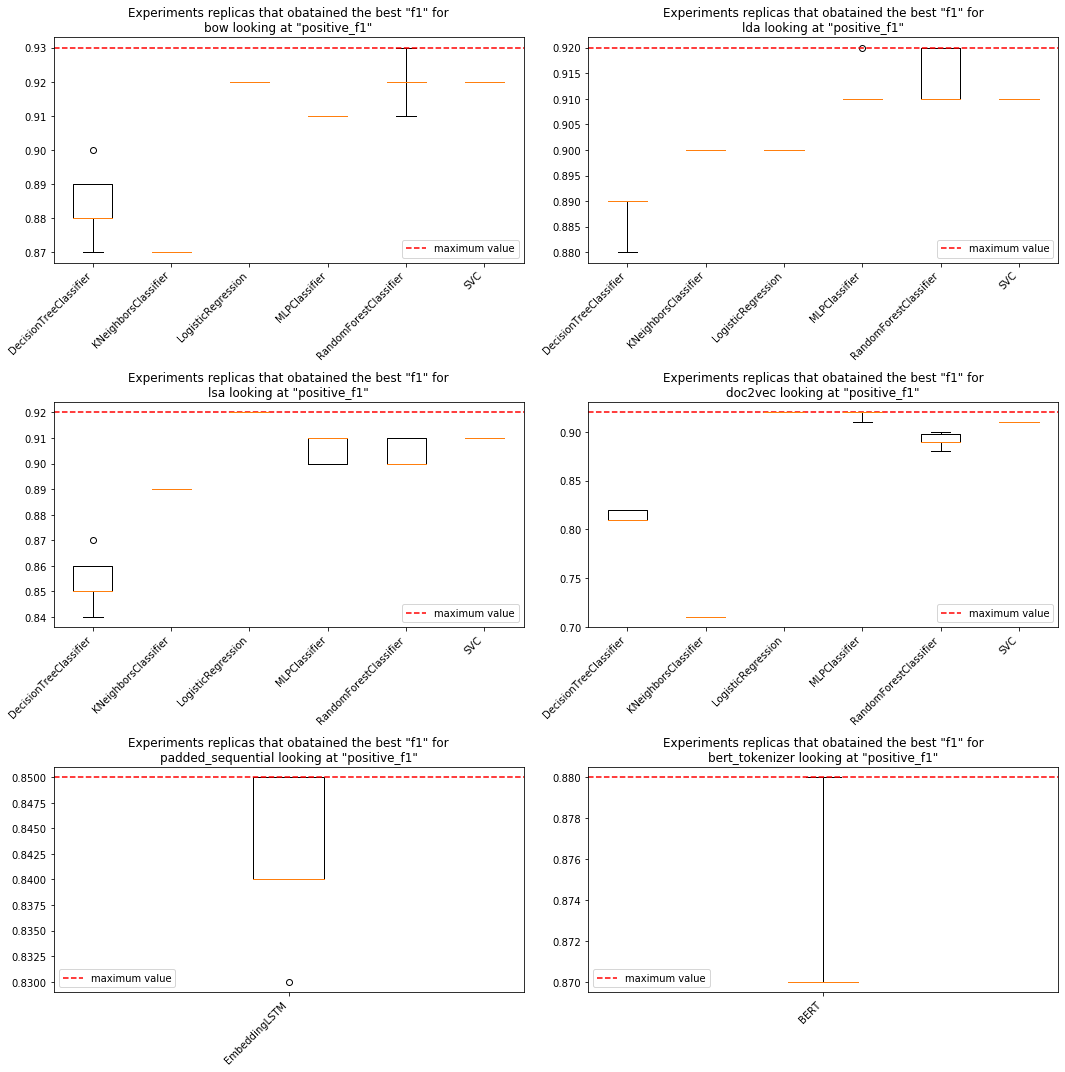

In [47]:
_ = show_replica_results(measure="positive_f1", current_measure="f1")

## Results for the replicas with better values for the measure `positive_f1`

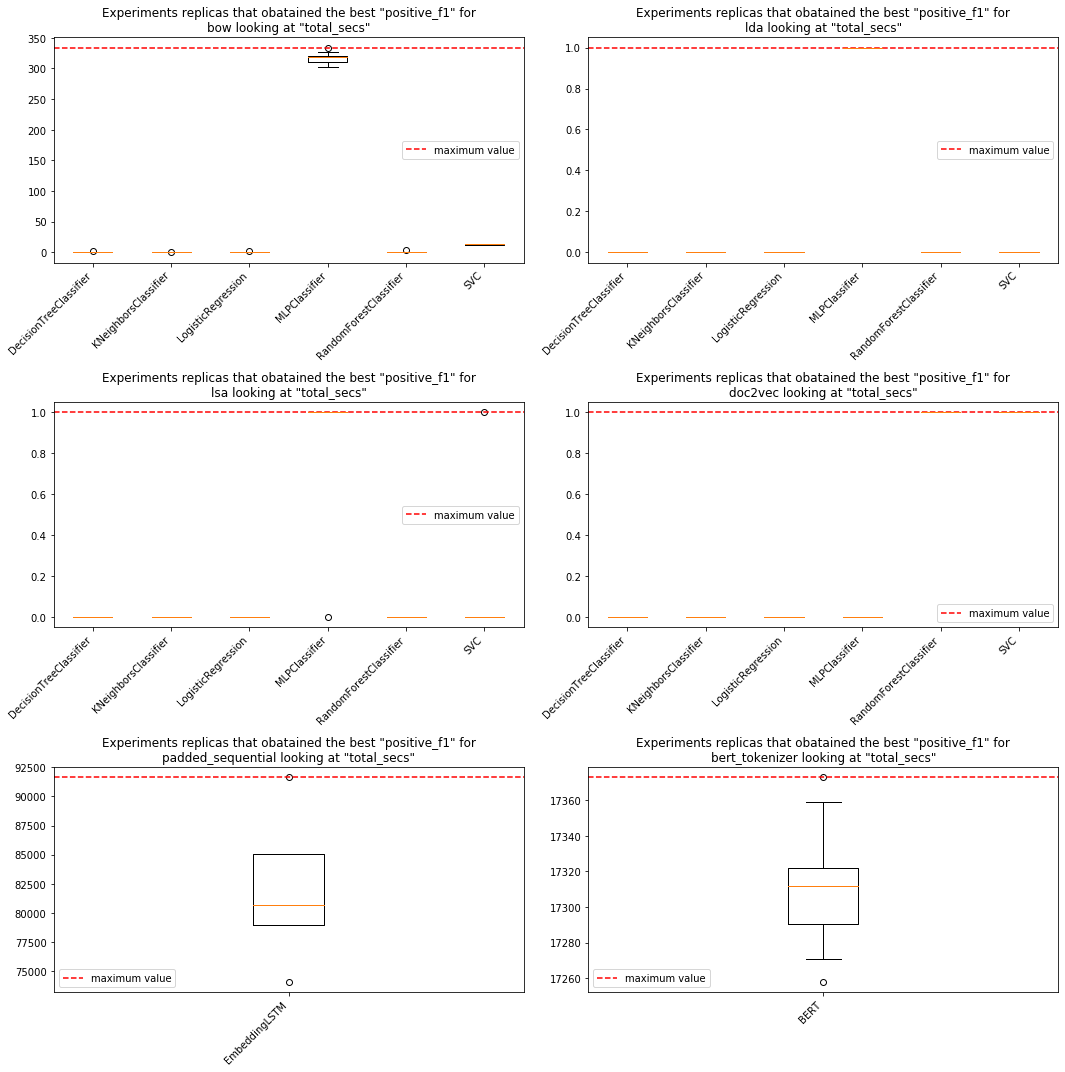

In [48]:
_ = show_replica_results(measure="total_secs", current_measure="positive_f1")

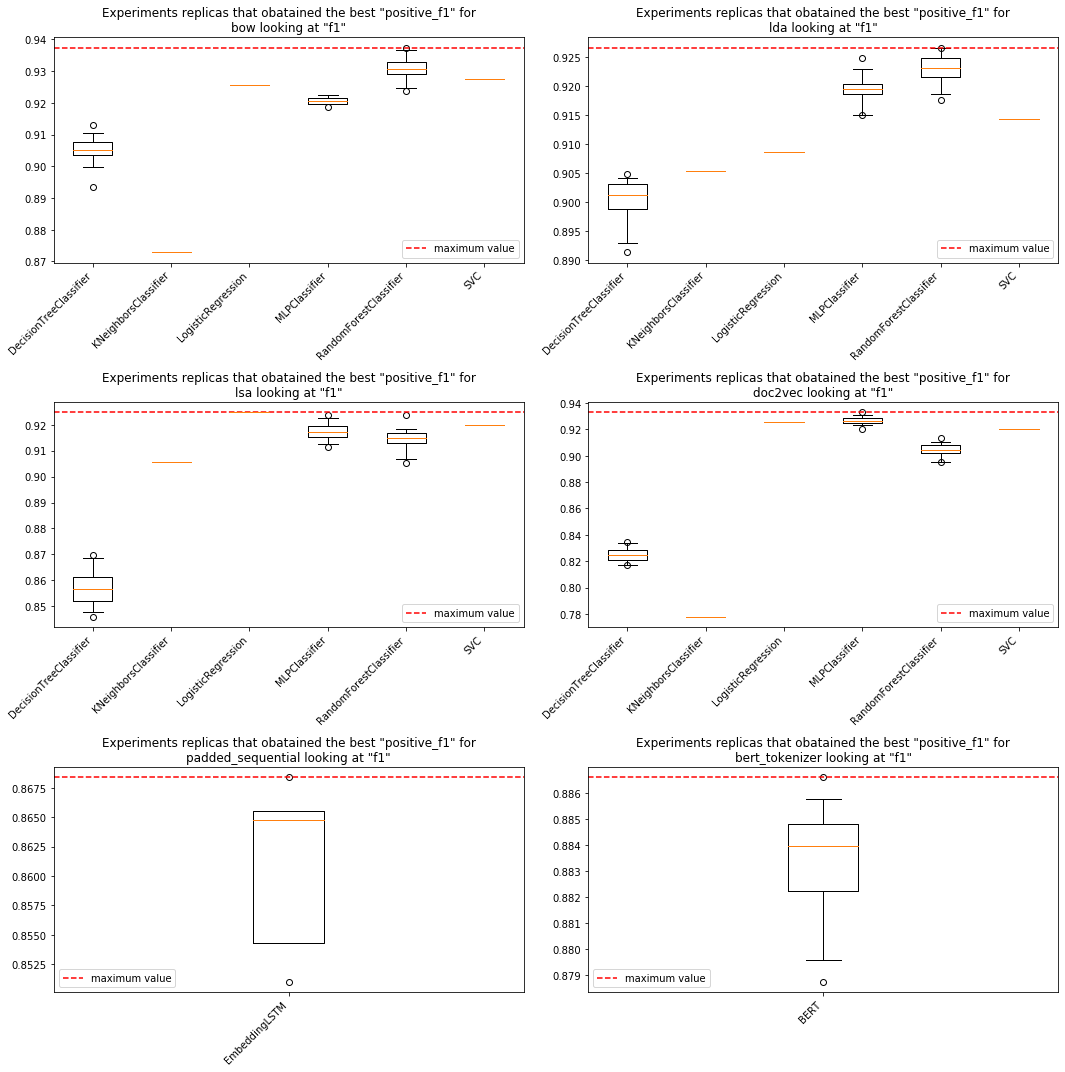

In [49]:
_ = show_replica_results(measure="f1", current_measure="positive_f1")

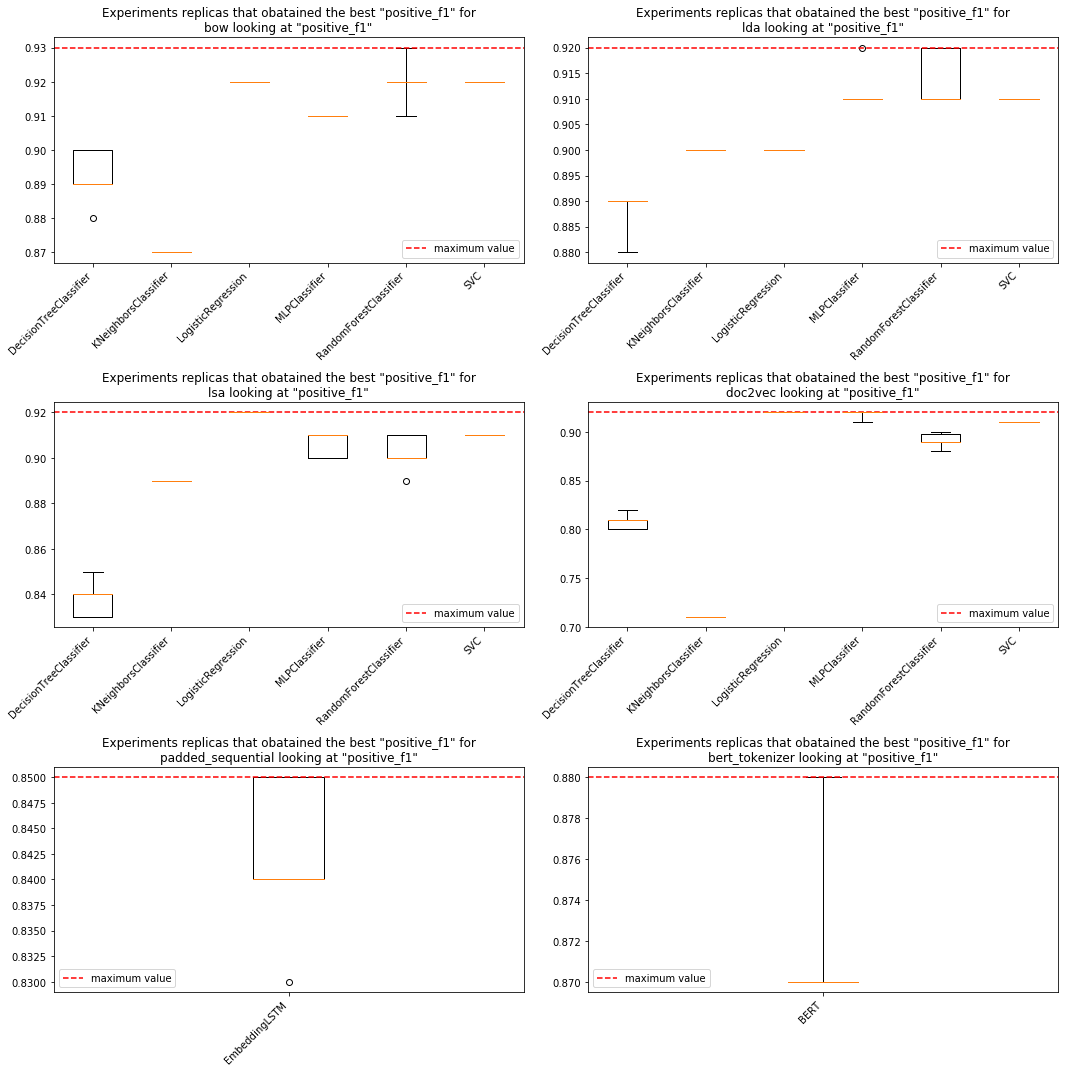

In [50]:
figure = show_replica_results(measure="positive_f1", current_measure="positive_f1")

file_name = "13_positive_f1_best_experiments_positive_f1_comparison.png"
file_path = os.path.join(PATH_TO_REPORT_FIGURES, file_name)
figure.savefig(fname=file_path, dpi=fig_dip)